In [4]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load example stock price data (Apple from Yahoo Finance via pandas_datareader or CSV)

In [5]:
%pip install yfinance --quiet

import yfinance as yf
df = yf.download("AAPL", start="2010-01-01", end="2023-12-31")
df.reset_index(inplace=True)

[*********************100%***********************]  1 of 1 completed

Note: you may need to restart the kernel to use updated packages.


# Use the 'Close' column and normalize it

In [6]:
prices = df['Close'].values.astype(np.float32)
prices = (prices - prices.mean()) / prices.std()  # Standardize

# Create sequences (past 30 days → next day)

In [7]:
def create_dataset(series, window=30):
    X, y = [], []
    for i in range(len(series) - window):
        X.append(series[i:i+window])
        y.append(series[i+window])
    return np.array(X), np.array(y)
 
window_size = 30
X, y = create_dataset(prices, window=window_size)
X = X[..., np.newaxis]  # Add channel dimension

# Split data into training and testing sets

In [8]:
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Build simple RNN model

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(64, input_shape=(window_size, 1)),
    tf.keras.layers.Dense(1)
])

c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# Compile and train the model

In [10]:
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0580 - val_loss: 0.0090
Epoch 2/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.4581e-04 - val_loss: 0.0074
Epoch 3/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.1509e-04 - val_loss: 0.0065
Epoch 4/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.3186e-04 - val_loss: 0.0061
Epoch 5/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.1832e-04 - val_loss: 0.0056
Epoch 6/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.8672e-04 - val_loss: 0.0059
Epoch 7/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.8306e-04 - val_loss: 0.0055
Epoch 8/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.6720e-04 - val_loss: 0.0052
Epoch 9/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.7278e-04 - val_loss: 0.0048
Epoch 10/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.4377e-04 - val_loss: 0.0049


# Predict on test set

In [11]:
preds = model.predict(X_test[:100]).flatten()
true = y_test[:100]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


# Plot predictions vs true values

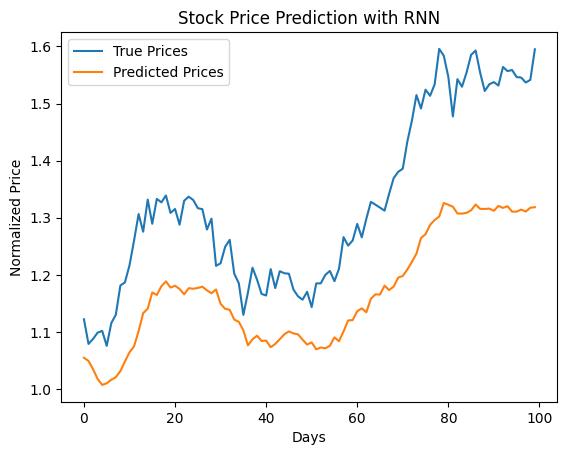

In [12]:
plt.plot(true, label='True Prices')
plt.plot(preds, label='Predicted Prices')
plt.title("Stock Price Prediction with RNN")
plt.xlabel("Days")
plt.ylabel("Normalized Price")
plt.legend()
plt.show()